# Hopfield network of pattern recognition

In [1]:
import numpy as np
from scipy.misc import imread
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
image = imread('small-deal-with-it.png', mode="L")
print(image.shape)
image = image.astype(int)
image

(128, 128)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [3]:
np.unique(image)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  63,  65,  66,  67,
        68,  69,  70,  71,  72,  73,  74,  75,  76,  81,  82,  83,  84,
        85,  86,  87,  88,  89,  90,  91,  93,  94,  95,  96,  97,  98,
        99, 100, 101, 102, 103, 104, 105, 106, 109, 112, 115, 124, 126,
       142, 180, 181, 187, 192, 197, 212, 255])

In [4]:
image[image > 1] = 1
image[image < 1] = -1
image

array([[-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       ..., 
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1]])

In [5]:
np.unique(image)

array([-1,  1])

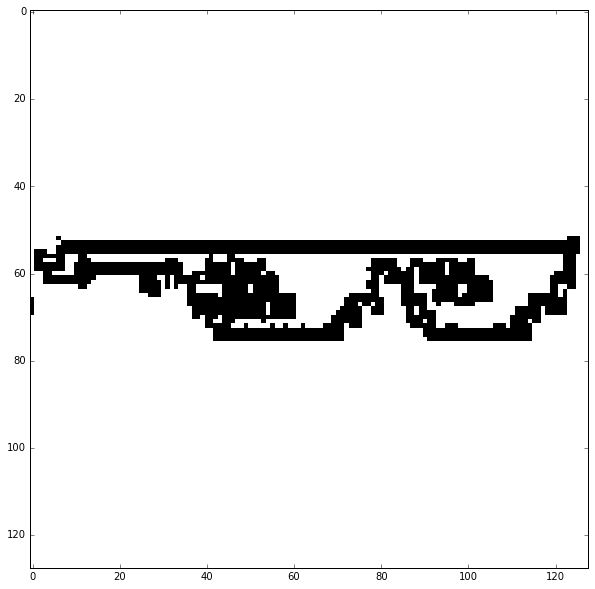

In [6]:
plt.figure(figsize=(20,10));
plt.imshow(image, cmap='Greys', interpolation='nearest')
plt.show()

A little gnarly looking, but it'll work for now. Now make weights.

In [7]:
flattened = image.flatten()
flattened.shape

(16384,)

**This can take a little while...**

In [8]:
flatlen = len(flattened)
weights = np.zeros(shape=(flatlen,flatlen))

for preix, pre in enumerate(flattened):
    for postix, post in enumerate(flattened[preix:]):
        if preix == postix:
            weights[preix,postix] = 0
        else:
            weights[preix,postix] = pre*post
            weights[postix,preix] = weights[preix,postix]

Now start with a noisy version of the image. We'll just flip a certain number of random pixels on each row of the image.

In [12]:
numb_flipped = 60

noisy = image.copy()

for idx, row in enumerate(noisy):
    for _ in range(numb_flipped):
        choice = np.random.choice(range(len(row)))
        noisy[idx,choice] = -row[idx]

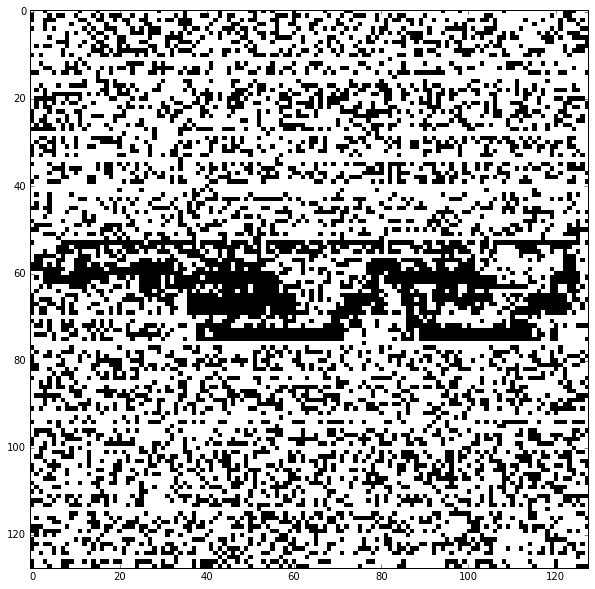

In [13]:
plt.figure(figsize=(20,10));
plt.imshow(noisy, cmap='Greys', interpolation='nearest')
plt.show()

Now we can start with that, and use the weights to update it. We'll update the units asynchronously (one at a time).

In [16]:
steps = 50000
theta = 0
noisy_flat = noisy.flatten()

for _ in range(steps):
    unit = np.random.randint(low=0, high=(len(noisy_flat)-1))
    unit_weights = weights[unit,:]
    net_input = np.dot(unit_weights,noisy_flat)

    if net_input > theta:
        noisy_flat[unit] = 1
    else:
        noisy_flat[unit] = -1

noisy = np.reshape(a=noisy_flat, newshape=(len(image),len(image)))

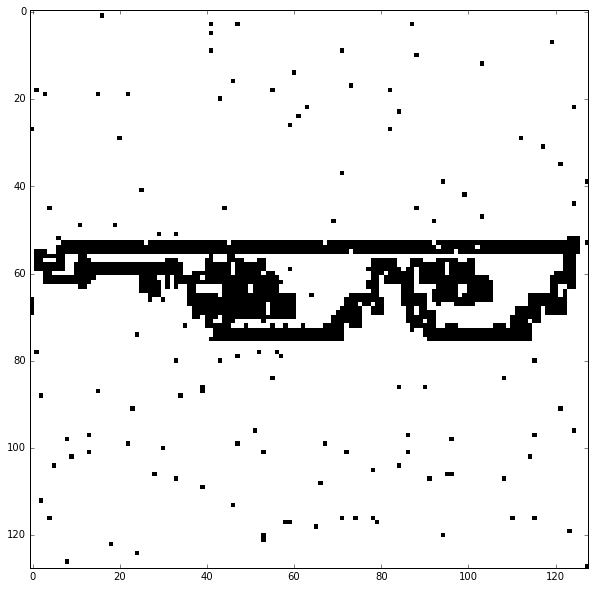

In [17]:
plt.figure(figsize=(20,10));
plt.imshow(noisy, cmap='Greys', interpolation='nearest')
plt.show()

Voila.